In [ ]:
 !pip install svgling
 from svgling import draw_tree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
from nltk.grammar import CFG
from nltk import ChartParser

In [ ]:
 grammar = CFG.fromstring("""
    E -> '⊤' | '⊥' |'p' | 'q' | 'r' | 'a' | 'b' | 'c' | 'd'
    E -> '¬' E | E '∨' E | E '∧' E | E '→' E | E '↔' E | '(' E ')'
    """)
parser = ChartParser(grammar)

In [ ]:
def arbolito(*args):
    trees = []
    for a in args:
      trees = trees + list(parser.parse(a))

    print(len(trees), 'maneras diferentes')

    for tree in trees:
        print(tree, end="\n")

    return trees[0]

7 maneras diferentes
(E (E ¬ (E (E ( (E (E p) ∧ (E q)) )) ↔ (E ¬ (E p)))) ∨ (E ¬ (E q)))
(E (E (E ¬ (E ( (E (E p) ∧ (E q)) ))) ↔ (E ¬ (E p))) ∨ (E ¬ (E q)))
(E (E ¬ (E ( (E (E p) ∧ (E q)) ))) ↔ (E ¬ (E (E p) ∨ (E ¬ (E q)))))
(E (E ¬ (E ( (E (E p) ∧ (E q)) ))) ↔ (E (E ¬ (E p)) ∨ (E ¬ (E q))))
(E ¬ (E (E ( (E (E p) ∧ (E q)) )) ↔ (E ¬ (E (E p) ∨ (E ¬ (E q))))))
(E ¬ (E (E ( (E (E p) ∧ (E q)) )) ↔ (E (E ¬ (E p)) ∨ (E ¬ (E q)))))
(E ¬ (E (E (E ( (E (E p) ∧ (E q)) )) ↔ (E ¬ (E p))) ∨ (E ¬ (E q))))


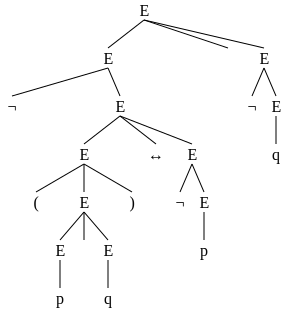

In [ ]:
A = list('¬(p∧q)↔¬p∨¬q')
arbolito(A)

In [ ]:
import pandas as pd
import itertools

In [ ]:
def bool_to_str(valor):
    return "V" if valor else "F"

In [ ]:
# Genera todas las combinaciones posibles de valores True y False
def generar_valores(num_variables):
    return list(itertools.product([True, False], repeat=num_variables))

In [ ]:
def get_minterminos(df, num_variables):
    resultados = []
    for _, row in df.iterrows():
        if row.iloc[-1] == "V":
            bin_str = ''.join(['1' if val == 'V' else '0' for val in row.iloc[:num_variables]])
            entero = int(bin_str, 2)
            resultados.append(entero)
    return resultados

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def image(df, nombre_archivo):
  fig, ax = plt.subplots(figsize=(8, 4))

  ax.axis('off')

  tabla = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

  tabla.auto_set_font_size(False)
  tabla.set_fontsize(12)
  tabla.scale(2, 2)

  for i, col in enumerate(df.columns):
    tabla.auto_set_column_width([i])

  plt.savefig(f'{nombre_archivo}.png', bbox_inches='tight', dpi=500)

  plt.show()

Mintérminos:  [3, 2, 1, 0]


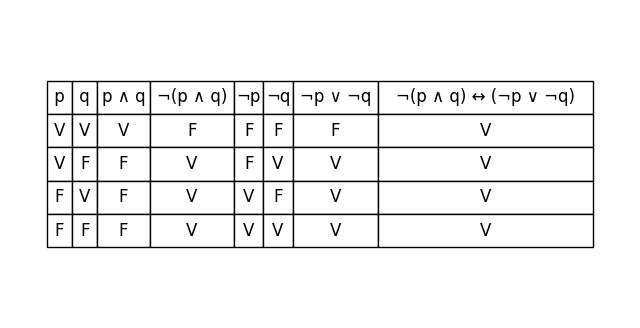

In [ ]:
# Ejercicio a)

num_variables = 2
valores = generar_valores(num_variables)

tabla_verdad = [
    [bool_to_str(p),
     bool_to_str(q),
     bool_to_str(p and q),
     bool_to_str(not (p and q)),
     bool_to_str(not p),
     bool_to_str(not q),
     bool_to_str(not p or not q),
     bool_to_str(not (p and q) == (not p or not q))]
    for p, q in valores
]

df = pd.DataFrame(tabla_verdad, columns=[" p ", " q ", "p ∧ q", "¬(p ∧ q)", "¬p", "¬q", "¬p ∨ ¬q", "¬(p ∧ q) ↔ (¬p ∨ ¬q)"])
print('Mintérminos: ', get_minterminos(df, num_variables))
image(df, '1a')
#df

Mintérminos:  [3, 2, 1, 0]


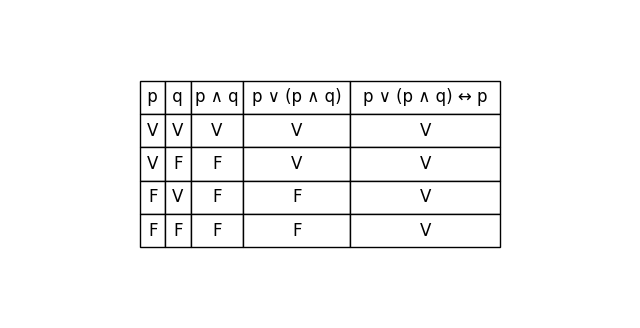

In [ ]:
# Ejercicio b)

num_variables = 2
valores = generar_valores(num_variables)

tabla_verdad = [
    [bool_to_str(p),
     bool_to_str(q),
     bool_to_str(p and q),
     bool_to_str(p or (p and q)),
     bool_to_str((p or (p and q)) == p)]
    for p, q in valores
]

df = pd.DataFrame(tabla_verdad, columns=[" p ", " q ", "p ∧ q", "p ∨ (p ∧ q)", "p ∨ (p ∧ q) ↔ p"])
print('Mintérminos: ', get_minterminos(df, num_variables))
image(df, '1b')
#df

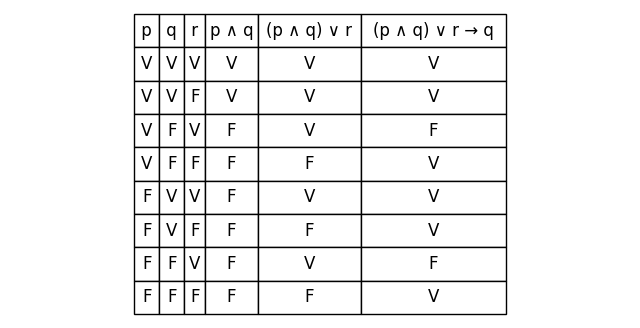

Mintérminos:  [7, 6, 4, 3, 2, 0]


In [ ]:
# Ejercicio c)

num_variables = 3
valores = generar_valores(num_variables)

tabla_verdad = [
    [bool_to_str(p),
     bool_to_str(q),
     bool_to_str(r),
     bool_to_str(p and q),
     bool_to_str(p and q or r),
     bool_to_str(((p and q) or r) <= q)]
    for p, q, r in valores
]

df = pd.DataFrame(tabla_verdad, columns=[" p ", " q ", " r ", "p ∧ q", "(p ∧ q) ∨ r", "(p ∧ q) ∨ r → q"])
image(df, '1c')
print('Mintérminos: ', get_minterminos(df, num_variables))
#df

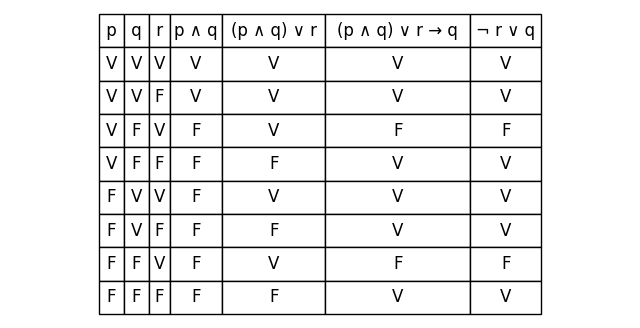

¬ r ∨ q es solución: True
Mintérminos:  [7, 6, 4, 3, 2, 0]


In [ ]:
# Ejercicio c)
# Solución con Algoritmo Quine-McCluskey

num_variables = 3
valores = generar_valores(num_variables)

tabla_verdad = [
    [bool_to_str(p),
     bool_to_str(q),
     bool_to_str(r),
     bool_to_str(p and q),
     bool_to_str(p and q or r),
     bool_to_str(((p and q) or r) <= q),
     bool_to_str((not r) or q)]
    for p, q, r in valores
]

df = pd.DataFrame(tabla_verdad, columns=[" p ", " q ", " r ", "p ∧ q", "(p ∧ q) ∨ r", "(p ∧ q) ∨ r → q", "¬ r ∨ q"])
image(df, '1c_res')
print('¬ r ∨ q es solución:', (df.iloc[1:, -1] == df.iloc[1:, -2]).all())
print('Mintérminos: ', get_minterminos(df, num_variables))
#df

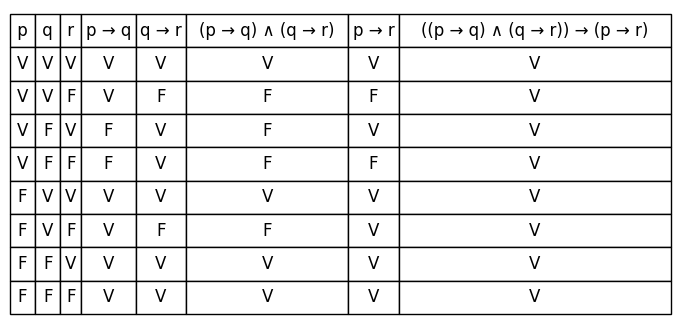

Mintérminos:  [7, 6, 5, 4, 3, 2, 1, 0]


In [ ]:
# Ejercicio d)

num_variables = 3
valores = generar_valores(num_variables)

tabla_verdad = [
    [bool_to_str(p),
     bool_to_str(q),
     bool_to_str(r),
     bool_to_str((not p or q)),
     bool_to_str((not q or r)),
     bool_to_str(((not p or q) and (not q or r))),
     bool_to_str((not p or r)),
     bool_to_str(((not p or q) and (not q or r)) <= (not p or r))]
    for p, q, r in valores
]

df = pd.DataFrame(tabla_verdad, columns=[" p ", " q ", " r ", "p → q", "q → r", "(p → q) ∧ (q → r)", "p → r", "((p → q) ∧ (q → r)) → (p → r)"])
image(df, '1d')
print('Mintérminos: ', get_minterminos(df, num_variables))
#df

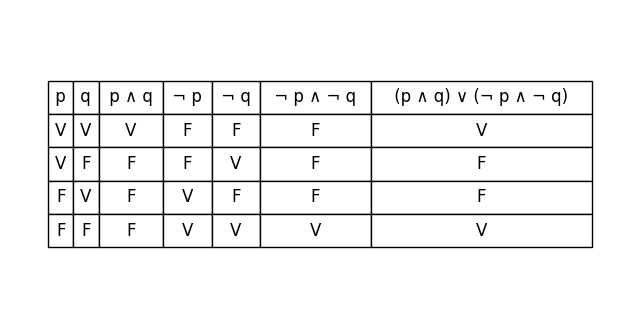

Mintérminos:  [3, 0]


In [ ]:
# Ejercicio 5.a)

num_variables = 2
valores = generar_valores(num_variables)

tabla_verdad = [
    [bool_to_str(p),
     bool_to_str(q),
     bool_to_str(p and q),
     bool_to_str(not p),
     bool_to_str(not q),
     bool_to_str(not p and not q),
     bool_to_str((p and q) or (not p and not q))]
       for p, q in valores
]

df = pd.DataFrame(tabla_verdad, columns=[" p ", " q ", " p ∧ q ", " ¬ p ", " ¬ q ", " ¬ p ∧ ¬ q ", " (p ∧ q) ∨ (¬ p ∧ ¬ q) "])
image(df, '5a')
print('Mintérminos: ', get_minterminos(df, num_variables))
#df